In [89]:
import numpy as np
import pandas as pd
import glob
from matplotlib import pyplot as plt
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
import sklearn.metrics
from sklearn.model_selection  import train_test_split
from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import HalvingRandomSearchCV
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
import joblib

In [85]:

datasets = glob.glob("WECs_DataSet/*")


df = pd.read_csv(datasets[0],header=None)

sub_array_list = [df.to_numpy()]

true_label_list = []

label_size  = df.shape[0]

true_label_list = [0 for i in range(label_size)]

for label, set in enumerate(datasets[1:]):
    subset = pd.read_csv(set,header=None)
    df = pd.concat([df,subset],ignore_index=True)
    label_size  = subset.shape[0]
    sub_array_list.append(subset.to_numpy())
    true_label_list.extend([label+1 for i in range(label_size)])

data_array = df.to_numpy()
true_label_array = np.array(true_label_list)

In [18]:
datasets

['WECs_DataSet\\Adelaide_Data.csv',
 'WECs_DataSet\\Perth_Data.csv',
 'WECs_DataSet\\Sydney_Data.csv',
 'WECs_DataSet\\Tasmania_Data.csv']

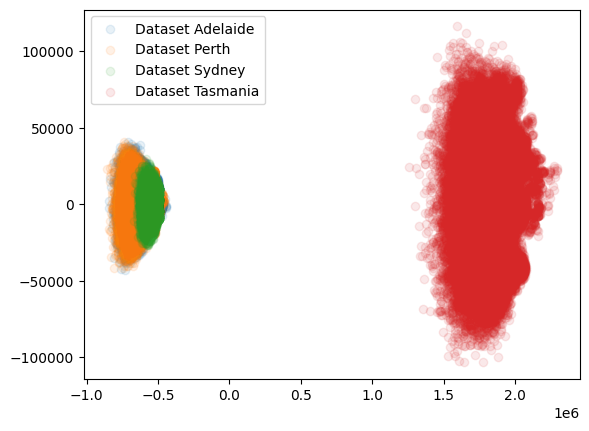

In [100]:
pca = PCA(n_components=2)
data_array_reduced = pca.fit_transform(data_array[:,:])

current_dataset =  0
current_index = 0
for x in sub_array_list:
    len_i = x.shape[0]
    plt.scatter(data_array_reduced[current_index:current_index+len_i,0],data_array_reduced[current_index:current_index+len_i,1],label=f"Dataset {datasets[current_dataset].split("\\")[-1].split("_")[0]}",alpha=.1)  
    current_index += len_i  
    current_dataset += 1

plt.legend()


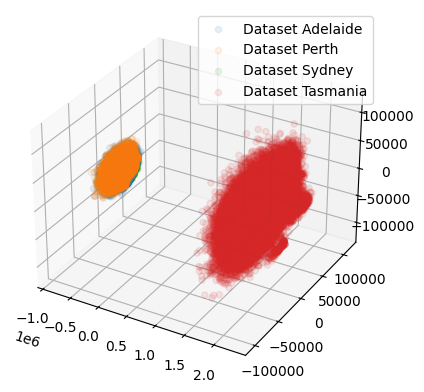

In [102]:
pca = PCA(n_components=3)
data_array_reduced = pca.fit_transform(data_array[:,:])

current_dataset =  0
current_index = 0

fig = plt.figure()
ax = fig.add_subplot(projection='3d')

for x in sub_array_list:
    len_i = x.shape[0]
    ax.scatter(data_array_reduced[current_index:current_index+len_i,0],data_array_reduced[current_index:current_index+len_i,1],data_array_reduced[current_index:current_index+len_i,2],label=f"Dataset {datasets[current_dataset].split("\\")[-1].split("_")[0]}",alpha=.1)  
    current_index += len_i  
    current_dataset += 1

ax.legend()

In [4]:
#train_atribs, test_atribs, train_labels, test_labels = train_test_split(data_array,true_label_array,test_size=.5,random_state=14212)

In [ ]:
train_atribs, test_atribs, train_labels, test_labels = train_test_split(data_array[:,:-2],true_label_array[:,:-2],test_size=.5,random_state=14212)

In [66]:
#pipeline = Pipeline(steps = [('scale',StandardScaler()),('rfc',RandomForestClassifier())])
#
#param_grid = {
#    "rfc__criterion": ["gini"],
#    "rfc__n_estimators": [x for x in range(1600,2000,50)],
#    "rfc__max_leaf_nodes": [x for x in range(1300,2000,100)],
#    "rfc__min_samples_leaf": [x for x in range(1,2000,200)], 
#    "rfc__max_depth" :[5,10,20,30,40,48]
#}
#
#HRSCV_forest = HalvingRandomSearchCV(pipeline,param_grid,n_jobs=5,refit=True)
#
#HRSCV_forest.fit(train_atribs, train_labels)
#
#forest = HRSCV_forest.best_estimator_

c:\Users\dange\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_search.py:318: UserWarning: The total space of parameters 3360 is smaller than n_iter=3599. Running 3360 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


In [67]:
#forest = HRSCV_forest.best_estimator_
#
#import joblib
#
#joblib.dump(forest,"BestScore.pkl")

['dump2.pkl']

In [68]:
#HRSCV_forest.best_score_

0.9347500193732274

In [69]:
#HRSCV_forest.best_params_

{'rfc__n_estimators': 1750,
 'rfc__min_samples_leaf': 1,
 'rfc__max_leaf_nodes': 1800,
 'rfc__max_depth': 48,
 'rfc__criterion': 'gini'}

Forest Best Params
{'rfc__n_estimators': 1750,
 'rfc__min_samples_leaf': 1,
 'rfc__max_leaf_nodes': 1800,
 'rfc__max_depth': 48,
 'rfc__criterion': 'gini'}

In [70]:
#prediction = forest.predict(test_atribs)

In [71]:
#f1_scores = f1_score(test_labels, prediction, average="macro")
#
#print(f1_scores)

0.9390808007144591


macro_f1 = 0.9390808007144591

In [75]:
#f1_scores = f1_score(test_labels, prediction, average=None)
#
#print(f1_scores)

[0.88078845 0.88642075 0.989114   1.        ]


Adelaide F1 = 0.88078845
Perth    F1 = 0.88642075 
Sydney   F1 = 0.989114   
Tasmania F1 = 1.        

In [72]:
#scores = cross_val_score(forest, train_atribs, train_labels,n_jobs=5)
#
#cv_score = scores.mean()
#
#cv_score


0.9375412179145881

CV_score = 0.9375412179145881

In [93]:
train_atribs, test_atribs, train_labels, test_labels = train_test_split(data_array,true_label_array,test_size=.25,random_state=14212)

In [94]:
#pipeline = Pipeline(steps = [('scale',StandardScaler()),('rfc',RandomForestClassifier(n_estimators= 1750,min_samples_leaf= 1,max_leaf_nodes= 1800,max_depth=49,criterion= 'gini'))])
#
#pipeline.fit(train_atribs,train_labels)
#
#prediction = pipeline.predict(test_atribs)

In [95]:
#f1_scores = f1_score(test_labels, prediction, average="macro")
#
#print(f1_scores)
#
#f1_scores = f1_score(test_labels, prediction, average=None)
#
#print(f1_scores)
#
#accuracy_scores = accuracy_score(test_labels, prediction)
#
#accuracy_scores

0.9390445655904758
[0.88104379 0.88617932 0.98895516 1.        ]


0.9392638888888889

macro_F1 = 0.9390445655904758
Adelaide F1 = 0.88104379 
Perth    F1 = 0.88617932 
Sydney   F1 = 0.98895516  
Tasmania F1 = 1.            
csv scpre = 0.9392638888888889

In [96]:
#joblib.dump(pipeline,"FocusTrain.pkl")

['BESTPICKLE.pkl']

In [97]:
pipeline = Pipeline(steps = [('scale',StandardScaler()),('rfc',RandomForestClassifier(n_estimators= 200,min_samples_leaf= 1,max_leaf_nodes= 1800,max_depth=49,criterion= 'gini'))])

pipeline.fit(train_atribs,train_labels)

prediction = pipeline.predict(test_atribs)

In [98]:
f1_scores = f1_score(test_labels, prediction, average="macro")

print(f1_scores)

f1_scores = f1_score(test_labels, prediction, average=None)

print(f1_scores)

accuracy_scores = accuracy_score(test_labels, prediction)

accuracy_scores

0.9381323672821851
[0.87934242 0.88453782 0.98864923 1.        ]


0.9383472222222222

macro_F1 = 0.9381323672821851
Adelaide F1 = 0.87934242
Perth    F1 = 0.88453782
Sydney   F1 = 0.98864923
Tasmania F1 = 1.            
csv scpre = 0.9383472222222222

In [99]:
joblib.dump(pipeline,"DownSizedModel.pkl")

['BESTPICKLE.pkl']